**Import libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch # YOLOv5 implemented using pytorch

In [ ]:
from IPython.display import Image #this is to render predictions

In [ ]:
%cd /content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5

/content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5


In [ ]:
!ls

benchmarks.py	 data	     LICENSE	  README.zh-CN.md   train.py	    yolov5s.pt
CITATION.cff	 detect.py   models	  requirements.txt  tutorial.ipynb
classify	 export.py   __pycache__  segment	    utils
CONTRIBUTING.md  hubconf.py  README.md	  setup.cfg	    val.py


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [ ]:
!pip install tensorflow==2.3.1
!pip install tensorboard==2.4.1

     |████████████████████████████████| 320.4 MB 11 kB/s 
     |████████████████████████████████| 459 kB 44.0 MB/s 
     |████████████████████████████████| 20.1 MB 1.6 MB/s 
     |████████████████████████████████| 2.9 MB 39.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully uninstalled gast-0.4.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.6.0
    Uninstalling tensorflow-2.6.0:
 

     |████████████████████████████████| 10.6 MB 8.9 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0


**Download Dataset**

# Divide the dataset in train and val folder.

In [ ]:
import os
from random import choice
import shutil

#arrays to store file names
imgs =[]
xmls =[]

#setup dir names
trainPath = '/s/chopin/l/grad/tskumar/Documents/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/dataset/images/train'
valPath = '/s/chopin/l/grad/tskumar/Documents/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/dataset/images/val'
crsPath = '/s/chopin/l/grad/tskumar/Documents/esml_ms/traffic_dataset/data/ts' #dir where images and annotations stored

#setup ratio (val ratio = rest of the files in origin dir after splitting into train and test)
train_ratio = 0.8
val_ratio = 0.2


#total count of imgs
totalImgCount = len(os.listdir(crsPath))/2

#soring files to corresponding arrays
for (dirname, dirs, files) in os.walk(crsPath):
    for filename in files:
        if filename.endswith('.txt'):
            xmls.append(filename)
        else:
            imgs.append(filename)


#counting range for cycles
countForTrain = int(len(imgs)*train_ratio)
countForVal = int(len(imgs)*val_ratio)
print("training images are : ",countForTrain)
print("Validation images are : ",countForVal)


training images are :  592
Validation images are :  148


In [ ]:

trainimagePath = trainPath
trainlabelPath = '/s/chopin/l/grad/tskumar/Documents/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/dataset/labels/train'
valimagePath = valPath
vallabelPath = '/s/chopin/l/grad/tskumar/Documents/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/dataset/labels/val'
#cycle for train dir
for x in range(countForTrain):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(trainimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(trainlabelPath, fileXml))


    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)



#cycle for test dir
for x in range(countForVal):

    fileJpg = choice(imgs) # get name of random image from origin dir
    fileXml = fileJpg[:-4] +'.txt' # get name of corresponding annotation file

    #move both files into train dir
    #shutil.move(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    #shutil.move(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))
    shutil.copy(os.path.join(crsPath, fileJpg), os.path.join(valimagePath, fileJpg))
    shutil.copy(os.path.join(crsPath, fileXml), os.path.join(vallabelPath, fileXml))

    #remove files from arrays
    imgs.remove(fileJpg)
    xmls.remove(fileXml)

#rest of files will be validation files, so rename origin dir to val dir
#os.rename(crsPath, valPath)
shutil.move(crsPath, valPath)




'/s/chopin/l/grad/tskumar/Documents/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/dataset/images/val/ts'

# Create dataset.yaml

## move the dataset’s dataset.yaml file to the /content/yolov5/data directory.
## This file contains information required by YOLO to train the model on the custom data.
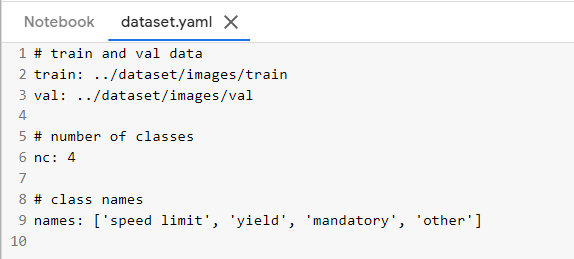

# Run

In [ ]:
ls

benchmarks.py    data/       LICENSE          requirements.txt  tutorial.ipynb
CITATION.cff     detect.py   models/          segment/          utils/
classify/        export.py   README.md        setup.cfg         val.py
CONTRIBUTING.md  hubconf.py  README.zh-CN.md  train.py


In [ ]:
!python3 train.py --img 415 --batch 16 --epochs 30 --data dataset.yaml --weights yolov5s.pt --cache

2023-12-07 03:27:35.024496: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 03:27:35.024549: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 03:27:35.024580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=

# Detect

In [ ]:
# !cp /content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/runs/train/exp/a.jpg /content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5/runs/train/exp

In [ ]:
!python3 detect.py --source runs/train/exp/a.jpg --weights /content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5/runs/train/exp/weights/best.pt'], source=runs/train/exp/a.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5/runs/train/exp/a.jpg: 384x640 2 speed limits, 42.2ms
Speed: 0.4ms pre-process, 42.2ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved 

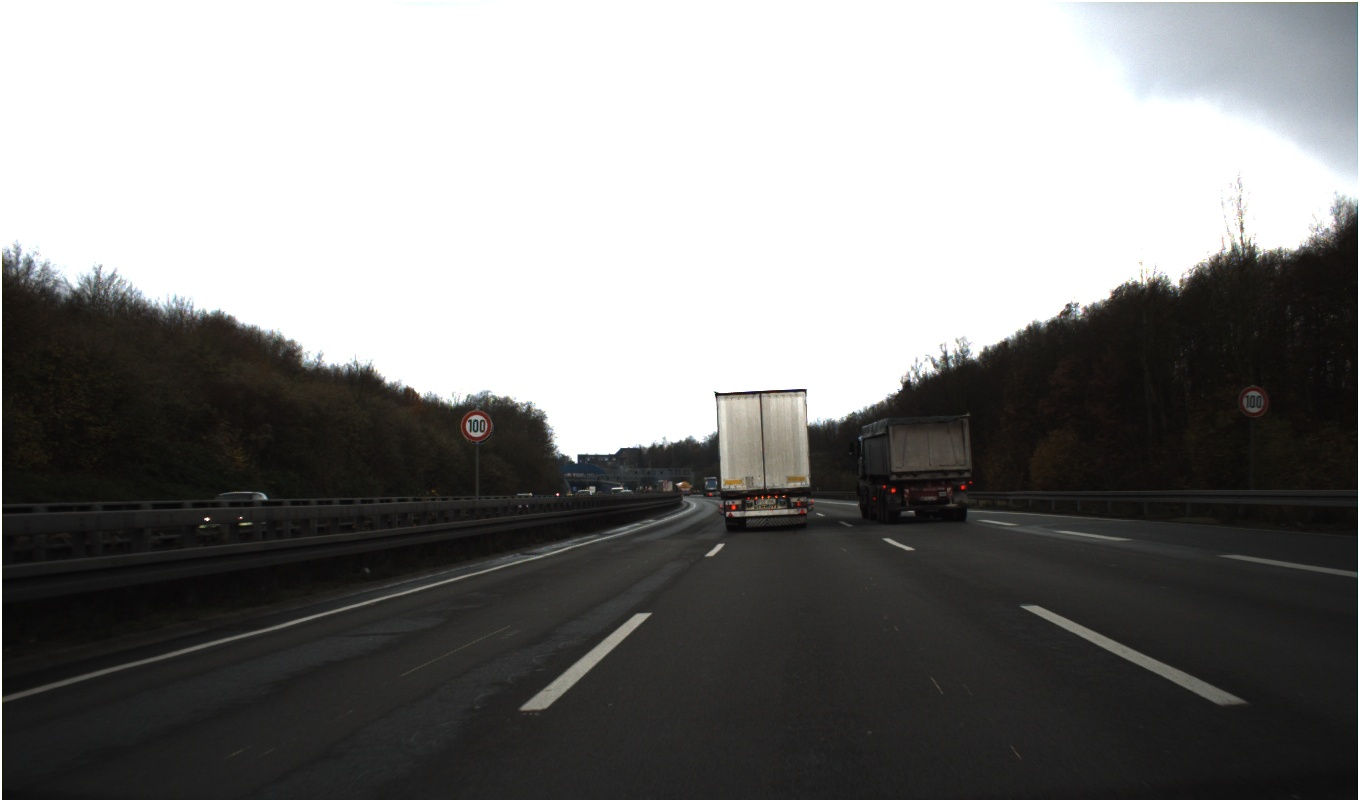

In [ ]:
Image(filename="/content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5/runs/train/exp/a.jpg", width=416)

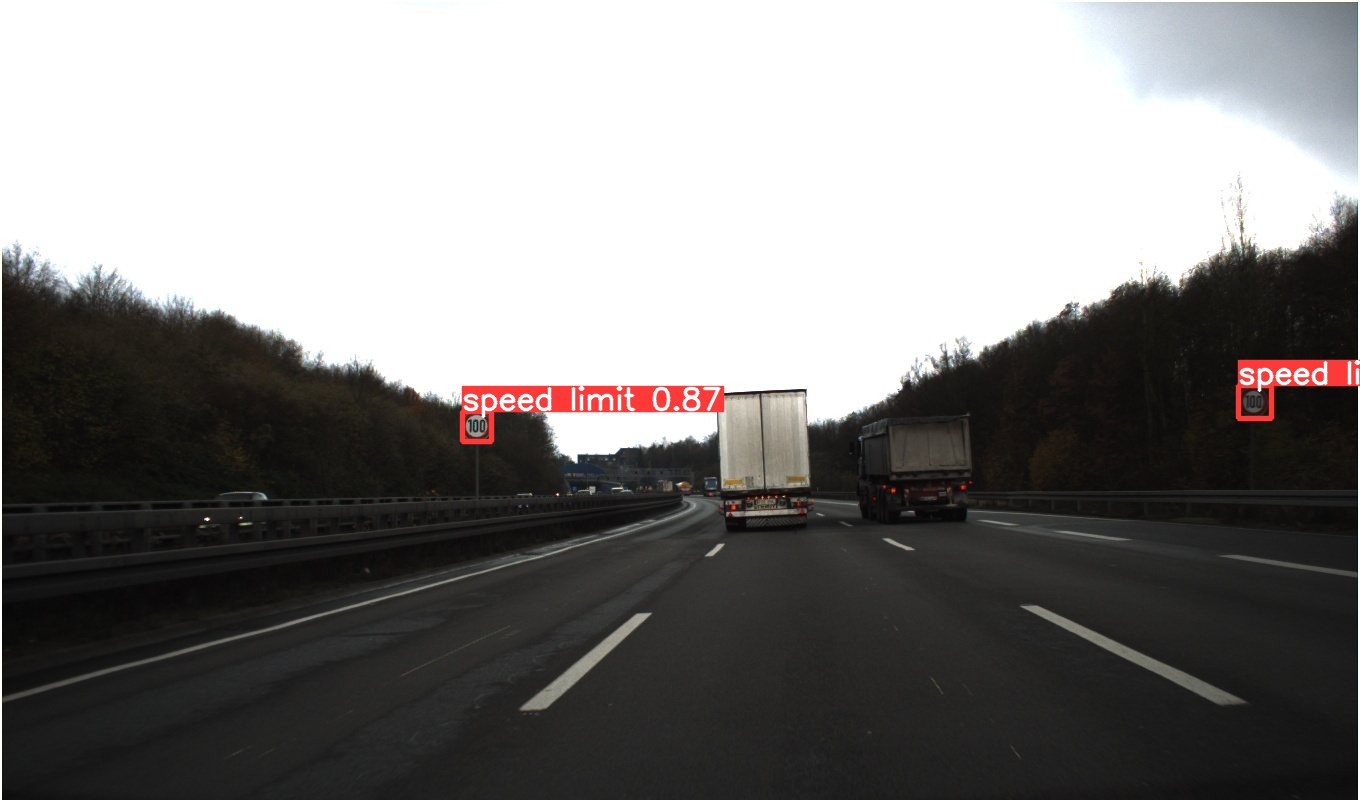

In [ ]:
Image(filename="/content/drive/MyDrive/esml_ms/Traffic-Signs-Dataset-in-YOLO-format/yolov5/runs/detect/exp3/a.jpg", width=416)